# Task 4.9.2: Intro to Data Visualization with Python. Part 2.

### 1. Import libraries and 'orders_prods_all' data set.

### 2. Histogram. Show the busiest time of the day.

### 3. Bar chart. Show the type of customers regarding the loyalty. 

### 4. Line Chart. Show a difference in expenditure through the day.

### 5. Line Chart. Explore the connections between age and number of dependents


### 6. Scatterplot. Show a connection between age and spending power (income).

### 7. Export plots from Jupiter.

## 1. Import libraries and 'orders_prods_all' data set.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\azikb\Downloads\Data Immersion. Assiginment 4. Python. Instacart Basket Analysis"

In [3]:
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

## 2. Create a Histogram.

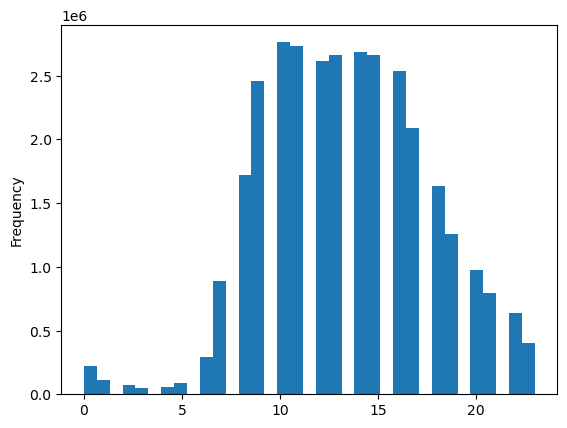

In [4]:
# Create a Histogram.
hist = orders_products_all['order_hour_of_day'].plot.hist(bins = 35)

##### The Histogram demonstrates the busiest time of the day when most of the purchases are made...

## 3. Create a Bar chart from the “loyalty_flag” column.

In [5]:
# First, let's count loyalty groups.
orders_products_all['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

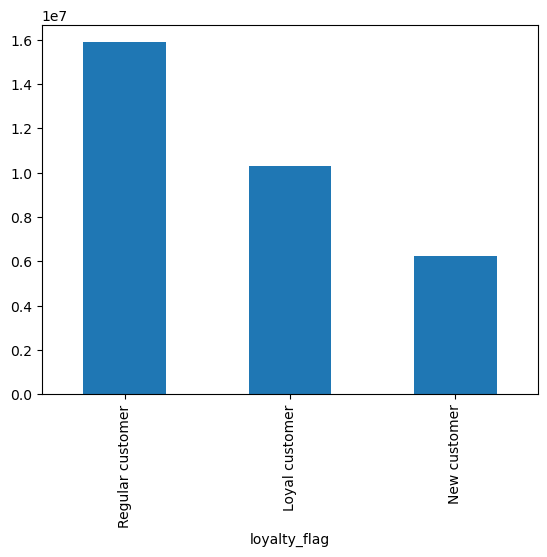

In [6]:
# Create an actual bar chart.
bar = orders_products_all['loyalty_flag'].value_counts().plot.bar()

## 4. Line Chart. Show a difference in expenditure (the “prices” column) depending on the hour of the day.

In [7]:
# First, check if we have a very high prices in data set.
orders_products_all.loc[orders_products_all['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Frequency_flag,first_name,second_name,gender,state,age,date_joined,num_of_dependants,family_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent Customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent Customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent Customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Frequent Customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Non-frequent Customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Frequent Customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [8]:
# Second, Let's mark outliers as missing data, using 'np.nan' - a function in NumPy.
orders_products_all.loc[orders_products_all['prices'] > 100, 'prices'] = np.nan

In [9]:
# Checking for max value
orders_products_all['prices'].max()

25.0

In [10]:
# Set the seed for the random number generator.
np.random.seed(4)

In [11]:
# Create a list 'dev'. 
# Logical test to the dataframe.
dev = np.random.rand(len(orders_products_all)) <= 0.7

In [12]:
# Checking for the output
dev

array([False,  True, False, ...,  True,  True,  True])

In [13]:
# Store 70 % of the sample in dataframe big
big = orders_products_all[dev]

In [14]:
# Store 30% of the sample in dataframe small
small = orders_products_all[~dev]

##### Check for the dataframe length..

In [15]:
# Checking main dataframe
len(orders_products_all)

32404859

In [16]:
# Checking subsets 
len(big)+len(small)

32404859

#### To reduce volume of dataframe, let's create a dataframe with several columns

In [17]:
# Create a small dataframe 'df_2' 
df_2 = small[['order_hour_of_day','prices']]

C:\Users\azikb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\azikb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


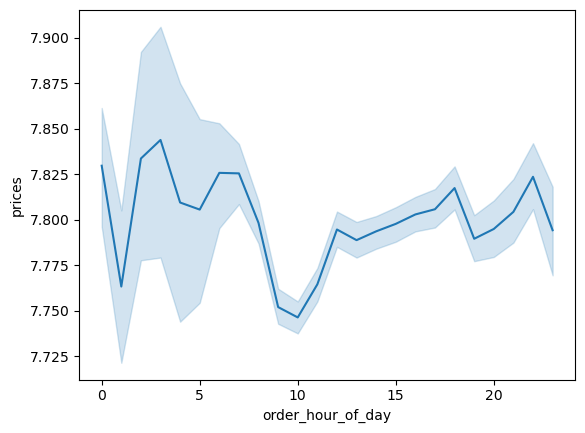

In [18]:
# Create a Line Chart
line1 = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

## 5. Create Line Chart. Exploring the connections between age and number of dependents

In [19]:
# Creating a small dataframe 'df3'
df_3 = small[['age','num_of_dependants']]

C:\Users\azikb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\azikb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


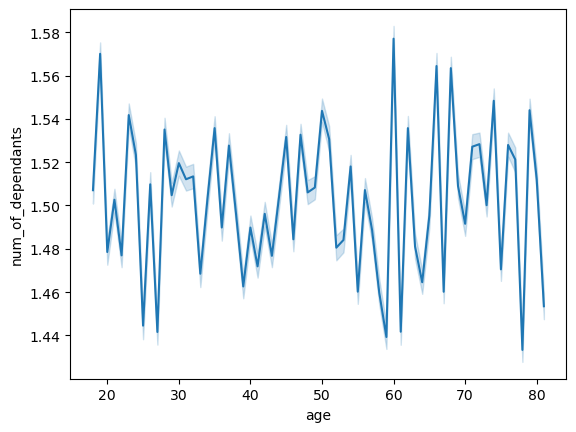

In [20]:
line = sns.lineplot(data = df_3, x = 'age',y = 'num_of_dependants')

#### As we can see, the line fluctuates up and down. We do not see any clear pattern or tendency..however, we see several high outliers at age 20, 61, 66, 68 and a low outliers at aged 25, 27, 59, 61, 78.

## 6. Scatterplot. Showing a connection between age and spending power (income).

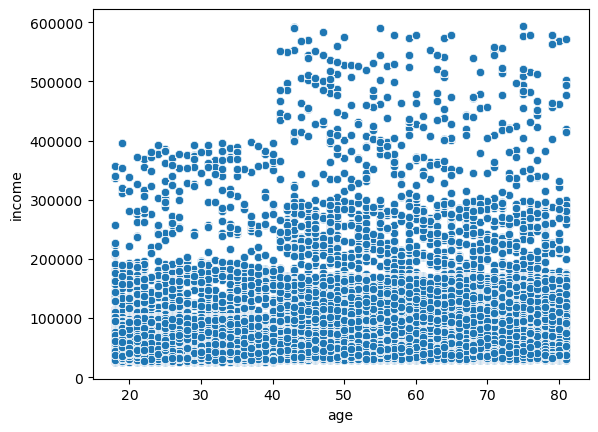

In [21]:
# Creating a scatter plot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = orders_products_all)

#### From my view, there are different groups of people with different incomes. We have young and old people with relatively high incomes. But the tendency shows, beginning from age '40' we can see high revenue.

## 7. Exporting plots from Jupiter.

In [22]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [23]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [24]:
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line1_order_hour_of_day_to_prices.png'))

In [25]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_to_num_of_dependants.png'))

In [26]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))